In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


DATASET_PATH = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
LABEL_COLUMN_NAME = 'Attrition'
TOP_K = 20
SCALE_METHOD = 'minmax'

# A. Understanding the dataset

In [30]:
# Import the dataset
dataframe = pd.read_csv(DATASET_PATH)
dataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
# Show the number of attributes (columns) and number of records (rows)
print("Number of attributes: ", dataframe.shape[1])
print("Number of records: ", dataframe.shape[0])

Number of attributes:  35
Number of records:  1470


In [32]:
# Show the statistics of the dataset
dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [33]:
# Count the number of missing values in the dataset
dataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [34]:
# Count the number of duplicate values in the dataset.
print("Number of duplicate values: ", dataframe.duplicated().sum())
dataframe[dataframe.duplicated(keep=False)]

Number of duplicate values:  0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


# B. Data cleaning

In [35]:
# drop the rows where the target is missing
dataframe.dropna(subset=[LABEL_COLUMN_NAME], inplace=True)

for column in dataframe.columns:
    if dataframe[column].dtype == 'object':  # Check if column is string
        dataframe[column] = dataframe[column].fillna(dataframe[column].mode()[0])
    else:  # Otherwise, it's a numeric column
        dataframe[column] = dataframe[column].fillna(dataframe[column].mean())


In [36]:
dataframe.drop_duplicates(inplace=True)
print("Number of duplicate values: ", dataframe.duplicated().sum())

Number of duplicate values:  0


In [37]:
dataframe = dataframe.reset_index(drop=True)

# C. Creation of input and output features

In [38]:
# create input and output data
features = dataframe.drop(LABEL_COLUMN_NAME, axis=1)
labels = dataframe[LABEL_COLUMN_NAME]

In [39]:
features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
labels

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# D. Conversion of features and labels into numeric values

In [41]:
print(features.dtypes)

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [42]:
# get name of columns with datatype object
object_columns = features.select_dtypes(include=['object']).columns
print("Columns to change", object_columns.to_list())

# convert the object columns to categorical
for col in object_columns:
    features[col] = features[col].astype('category')

print(features.dtypes)

Columns to change ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating   

In [43]:
columns = features.columns

# columns with one unique value - drop
columns_to_drop = [col for col in columns if features[col].nunique() == 1]

# columns for label encoding - columns with 2 unique values
columns_to_label_encode = [col for col in columns if features[col].nunique() == 2]

# columns for one hot encoding - columns with more than 2 unique values from categorical columns
categorical_columns = features.select_dtypes(include=['category']).columns
columns_to_one_hot_encode = [col for col in categorical_columns if features[col].nunique() > 2]

# columns to scale - columns  - these three
columns_to_scale = list(set(columns) - set(columns_to_drop) - set(columns_to_label_encode) - set(columns_to_one_hot_encode))


print("Columns to drop: ", columns_to_drop)
print("Columns to label encode: ", columns_to_label_encode)
print("Columns to one hot encode: ", columns_to_one_hot_encode)
print("Columns to scale: ", columns_to_scale)

Columns to drop:  ['EmployeeCount', 'Over18', 'StandardHours']
Columns to label encode:  ['Gender', 'OverTime', 'PerformanceRating']
Columns to one hot encode:  ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
Columns to scale:  ['YearsWithCurrManager', 'YearsInCurrentRole', 'RelationshipSatisfaction', 'NumCompaniesWorked', 'Age', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'MonthlyIncome', 'JobInvolvement', 'Education', 'EmployeeNumber', 'YearsAtCompany', 'HourlyRate', 'DistanceFromHome', 'WorkLifeBalance', 'JobSatisfaction', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'JobLevel', 'MonthlyRate', 'DailyRate']


In [44]:
# drop columns
features = features.drop(columns=columns_to_drop)

# one hot encode columns
features = pd.get_dummies(features, columns=columns_to_one_hot_encode)

# label encode columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in columns_to_label_encode:
    features[col] = label_encoder.fit_transform(features[col])

features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,11,0,1,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,1,4,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1373,2,2,4,4,1,92,2,1,3,2090,2396,6,1,15,0,2,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,1392,3,4,5,4,0,56,3,1,3,2909,23159,1,1,11,0,3,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,591,2,1,7,1,1,40,3,1,2,3468,16632,9,0,12,0,4,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [45]:
# label encode the labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

array([1, 0, 1, ..., 0, 0, 0])

# E. Scaling of features

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def scale_features(features, scaler, columns_to_scale=None):
    if scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaler")
    
    if columns_to_scale is None:
        return scaler.fit_transform(features)
    else:
        # duplicate the features
        features = features.copy()
        features[columns_to_scale] = scaler.fit_transform(features[columns_to_scale])
        return features

In [47]:
print("columns_to_scale:", columns_to_scale)
features_scaled = scale_features(features, SCALE_METHOD, columns_to_scale)
features_scaled.describe()

columns_to_scale: ['YearsWithCurrManager', 'YearsInCurrentRole', 'RelationshipSatisfaction', 'NumCompaniesWorked', 'Age', 'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'MonthlyIncome', 'JobInvolvement', 'Education', 'EmployeeNumber', 'YearsAtCompany', 'HourlyRate', 'DistanceFromHome', 'WorkLifeBalance', 'JobSatisfaction', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'JobLevel', 'MonthlyRate', 'DailyRate']


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.495339,0.573923,0.600000,0.512731,0.576644,0.265986,0.576190,0.289307,0.490629,0.299244,0.282993,0.300680,0.153741,0.570748,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.288840,0.289531,0.256041,0.291255,0.364361,0.490065,0.290420,0.237187,0.276735,0.367615,0.247918,0.285797,0.277557,0.450606,0.261424,0.360824,0.360403,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.237179,0.333333,0.000000,0.257143,0.333333,0.000000,0.333333,0.100158,0.239028,0.111111,0.000000,0.071429,0.000000,0.333333,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.501074,0.214286,0.500000,0.493227,0.666667,1.000000,0.514286,0.666667,0.250000,0.666667,0.205898,0.487513,0.222222,0.000000,0.214286,0.000000,0.666667,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.755190,0.464286,0.750000,0.752177,1.000000,1.000000,0.767857,0.666667,0.500000,1.000000,0.388099,0.737503,0.444444,1.000000,0.500000,0.000000,1.000000,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Analysis

In [48]:
features_df = pd.DataFrame(features_scaled, columns=features.columns) # scaled feature dataframe
labels_df = pd.DataFrame(labels, columns=[LABEL_COLUMN_NAME])

In [49]:
# correlation analysis of features with target
labels_series = labels_df[LABEL_COLUMN_NAME]
correlations = features_df.corrwith(labels_series)
correlations

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

In [50]:
# remove NaN values
correlations = correlations.dropna()

#  take the top k colums with most correlations
top_k = correlations.abs().sort_values(ascending=False).head(TOP_K)
top_k


OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
dtype: float64

In [51]:
import seaborn as sns

matrix_data = features_df[top_k.index].copy()
# add labels
matrix_data.loc[:, LABEL_COLUMN_NAME] = labels_df.loc[:, LABEL_COLUMN_NAME]
matrix_data.corr()

,OverTime,MaritalStatus_Single,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,JobRole_Sales Representative,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel_Travel_Frequently,JobSatisfaction,EnvironmentSatisfaction,JobRole_Laboratory Technician,MaritalStatus_Married,JobRole_Research Director,MaritalStatus_Divorced,Department_Research & Development,Attrition
OverTime,1.000000,-0.006498,0.012754,0.000544,-0.029758,0.006089,0.028062,0.003347,-0.041586,-0.000449,-0.011687,-0.003507,0.029392,0.024539,0.070132,-0.044774,-0.013502,0.002400,0.023462,-0.003036,0.246118
MaritalStatus_Single,-0.006498,1.000000,-0.089529,-0.087072,-0.086486,-0.089361,-0.119185,0.072439,-0.047793,-0.638957,-0.070935,-0.045253,0.027734,0.024571,0.009035,0.019873,-0.629981,-0.042299,-0.366691,-0.009990,0.175419
TotalWorkingYears,0.012754,-0.089529,1.000000,0.782208,0.460365,0.772893,0.680381,-0.207726,0.459188,0.010136,0.628133,-0.005533,-0.012177,-0.020185,-0.002693,-0.215426,0.053512,0.312148,0.036291,0.011087,-0.171063
JobLevel,0.000544,-0.087072,0.782208,1.000000,0.389447,0.950300,0.509604,-0.216559,0.375281,0.013984,0.534739,-0.012630,-0.021557,-0.001944,0.001212,-0.344608,0.050547,0.414319,0.037087,-0.107830,-0.169105
YearsInCurrentRole,-0.029758,-0.086486,0.460365,0.389447,1.000000,0.363818,0.212901,-0.149751,0.714365,0.050818,0.758754,0.008717,0.001680,-0.002305,0.018007,-0.131322,0.065488,0.136332,0.018532,-0.028151,-0.160545
MonthlyIncome,0.006089,-0.089361,0.772893,0.950300,0.363818,1.000000,0.497855,-0.201514,0.344079,0.005408,0.514285,-0.015271,-0.031658,-0.007157,-0.006259,-0.320906,0.056767,0.485818,0.032203,-0.064720,-0.159840
Age,0.028062,-0.119185,0.680381,0.509604,0.212901,0.497855,1.000000,-0.175785,0.202089,0.037510,0.311309,0.029820,-0.024743,-0.004892,0.010146,-0.143176,0.083919,0.185891,0.033120,0.017883,-0.159205
JobRole_Sales Representative,0.003347,0.072439,-0.207726,-0.216559,-0.149751,-0.201514,-0.175785,1.000000,-0.168743,-0.048067,-0.163464,-0.027282,0.055469,0.001413,0.002949,-0.113130,-0.023659,-0.058687,-0.052890,-0.336127,0.157234
YearsWithCurrManager,-0.041586,-0.047793,0.459188,0.375281,0.714365,0.344079,0.202089,-0.168743,1.000000,0.024698,0.769212,0.025976,0.012628,-0.027656,-0.004999,-0.107072,0.032972,0.131279,0.014095,-0.014963,-0.156199
StockOptionLevel,-0.000449,-0.638957,0.010136,0.013984,0.050818,0.005408,0.037510,-0.048067,0.024698,1.000000,0.015058,0.021523,-0.016142,0.010690,0.003432,0.013386,0.225574,0.015807,0.446285,0.016927,-0.137145


In [52]:
import matplotlib.pyplot as plt
import numpy as np 


# Separate the data based on numeric labels
unique_labels = labels_df[LABEL_COLUMN_NAME].unique()
classes = {}
for label in unique_labels:
    classes[label] = features_df.loc[labels_df[LABEL_COLUMN_NAME] == label]


def draw_scatter_plot(column_name):
    # Create a 1D scatter plot for sepal_width with numeric labels
    markers = ['o', 'x']
    for i, (key, value) in enumerate(classes.items()):
        plt.plot(value[column_name], np.zeros_like(value[column_name]), 
                 markers[i % 2], label=f"Class {key}")



    plt.legend()
    plt.xlabel(column_name)
    plt.title(f"1D Scatter Plot of {column_name} by Numeric Classes")
    plt.show()



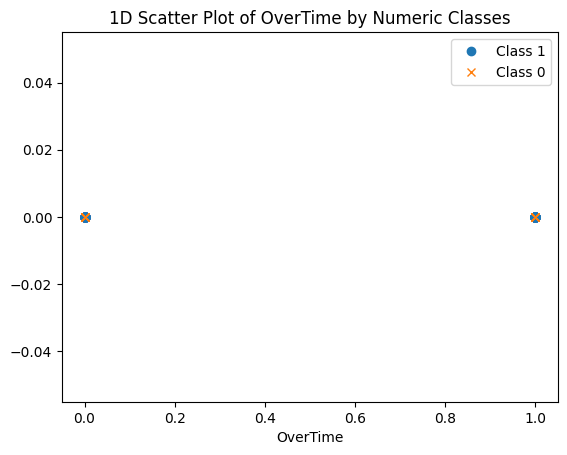

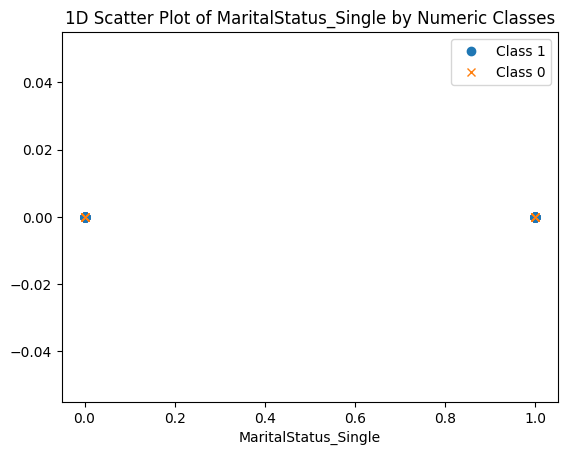

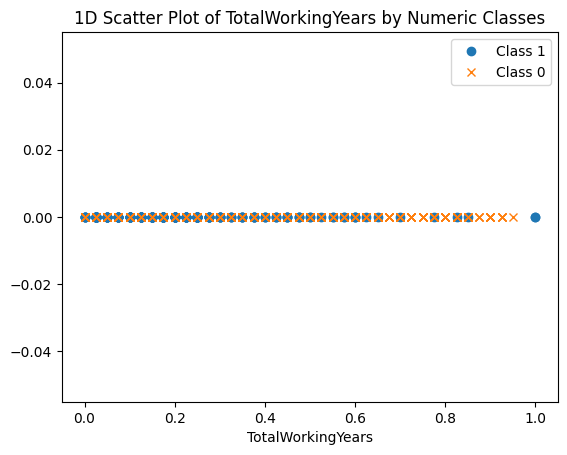

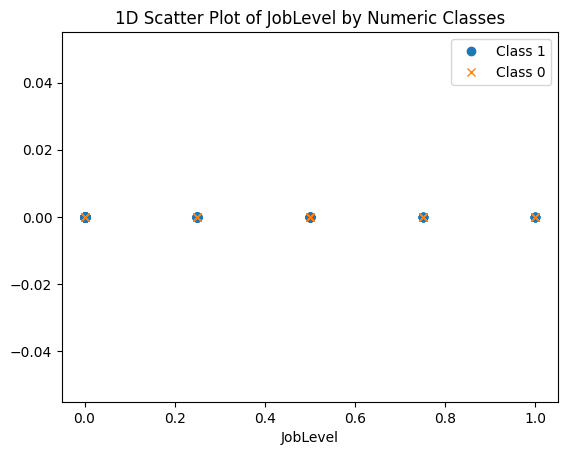

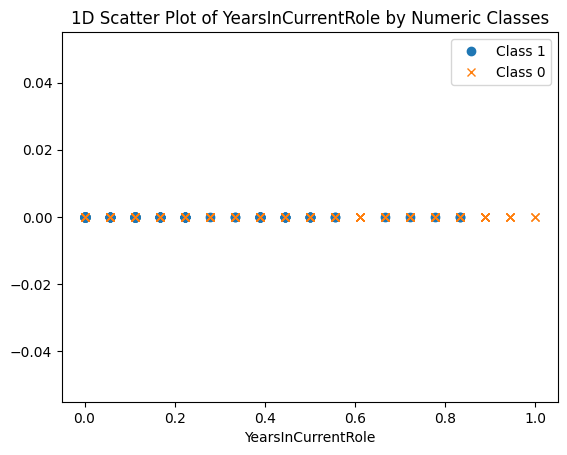

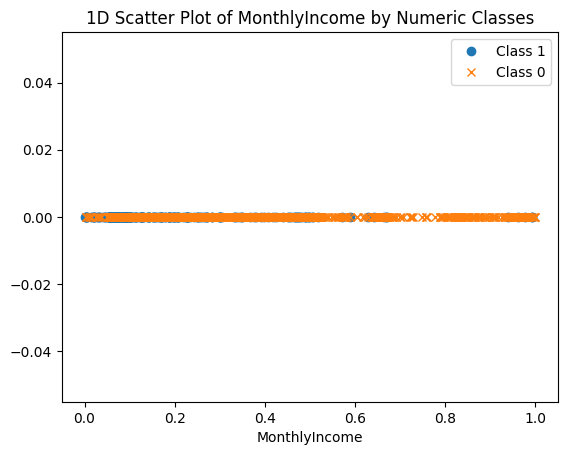

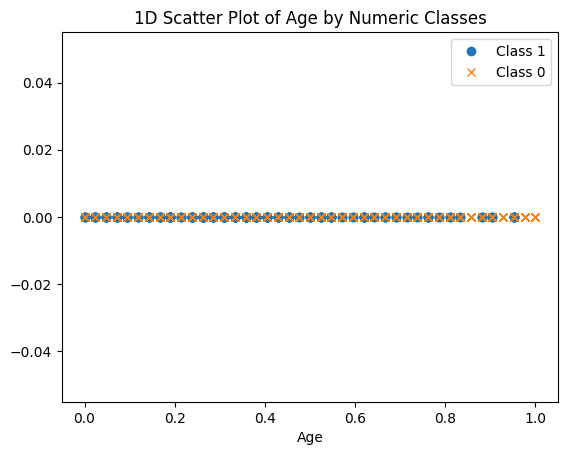

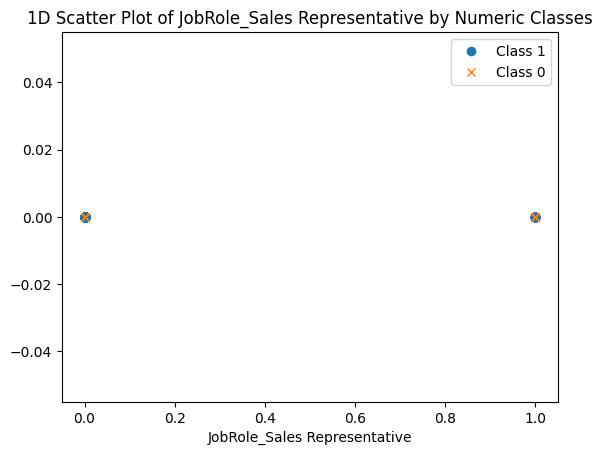

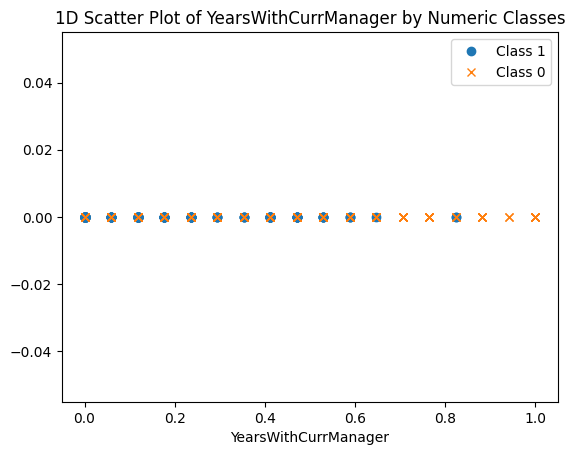

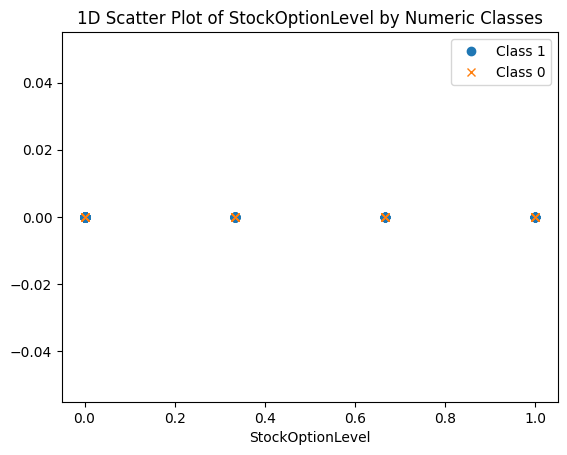

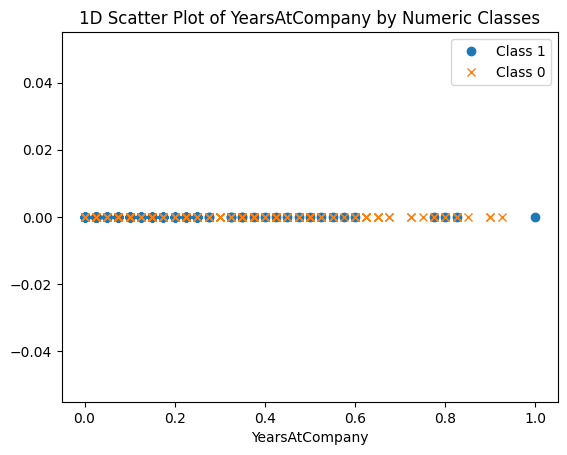

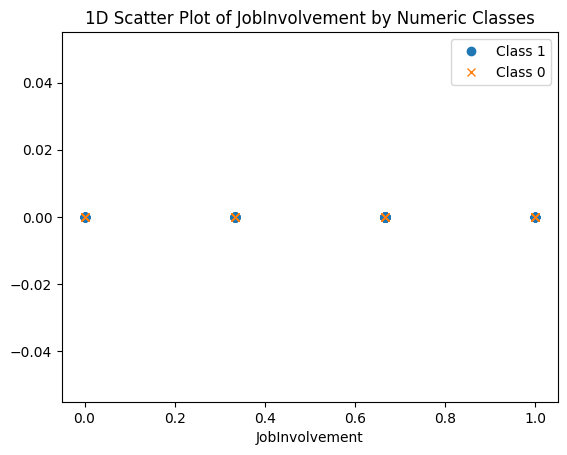

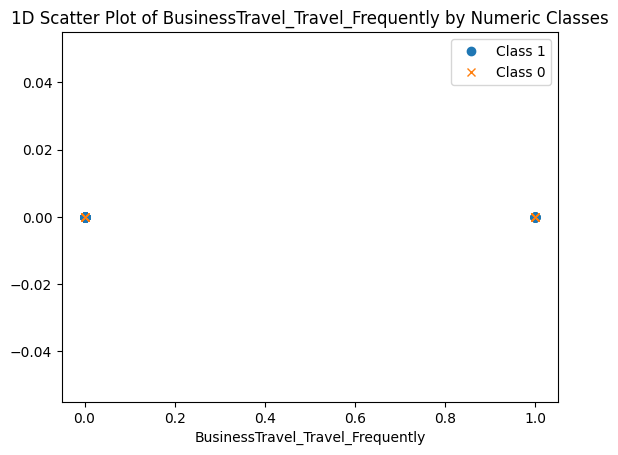

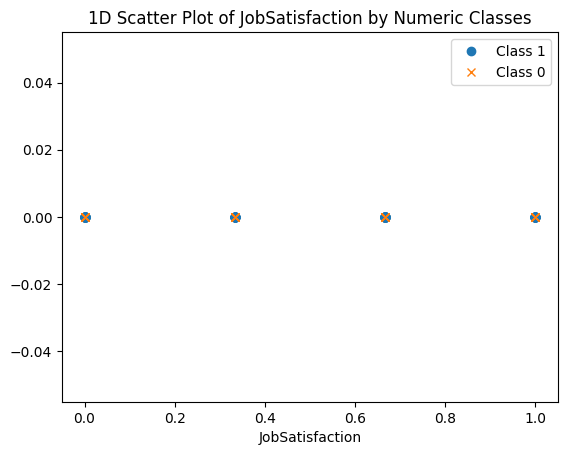

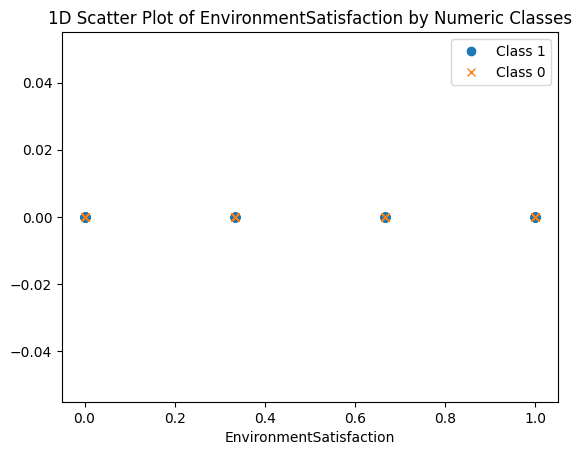

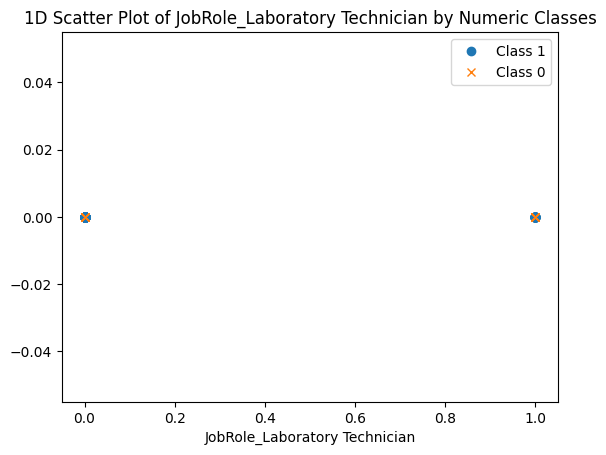

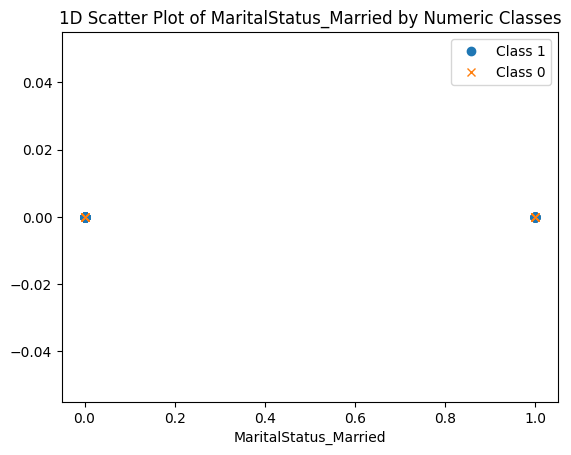

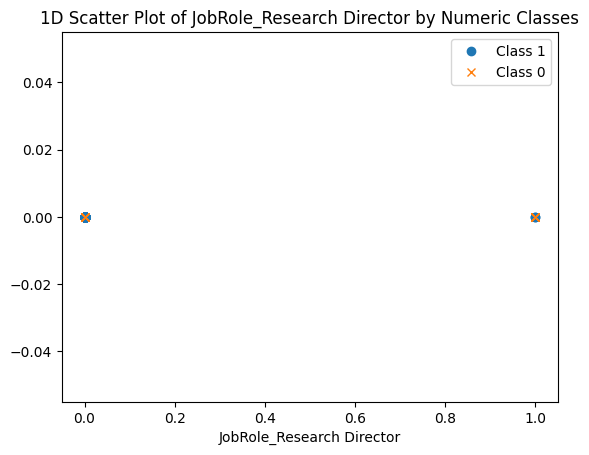

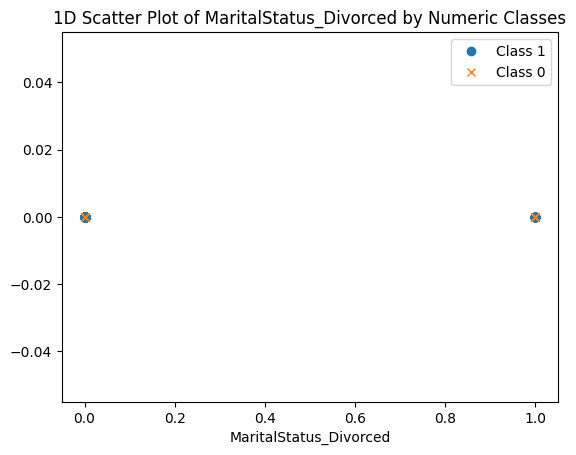

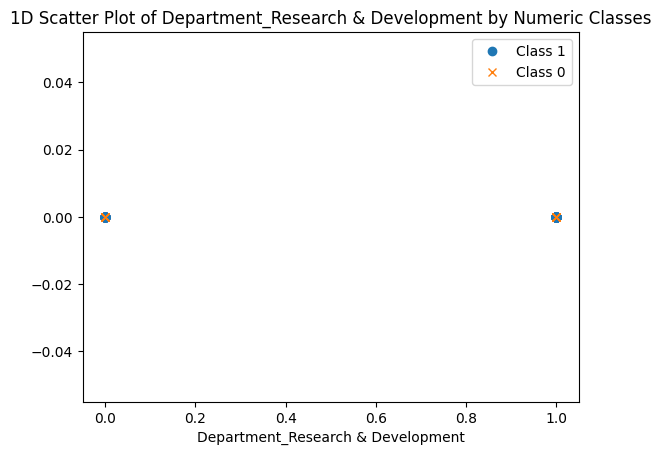

In [53]:
for feature in top_k.index:
    draw_scatter_plot(feature)

# G. Validating the pipeline 

In [54]:
cleaned_features = features_df[top_k.index]

In [55]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled
# y --> binary target class (0 or 1)
X = cleaned_features
y = np.ravel(labels_df)
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.88
